In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
data = np.load('neutrino0331n1000000.npz')

In [3]:
data.files

['ve_dune',
 'vu_dune',
 'vebar_dune',
 'vubar_dune',
 've_t2hk',
 'vu_t2hk',
 'vebar_t2hk',
 'vubar_t2hk',
 'theta12',
 'theta13',
 'theta23',
 'delta',
 'sdm',
 'ldm',
 'octant',
 'cpv',
 'mo']

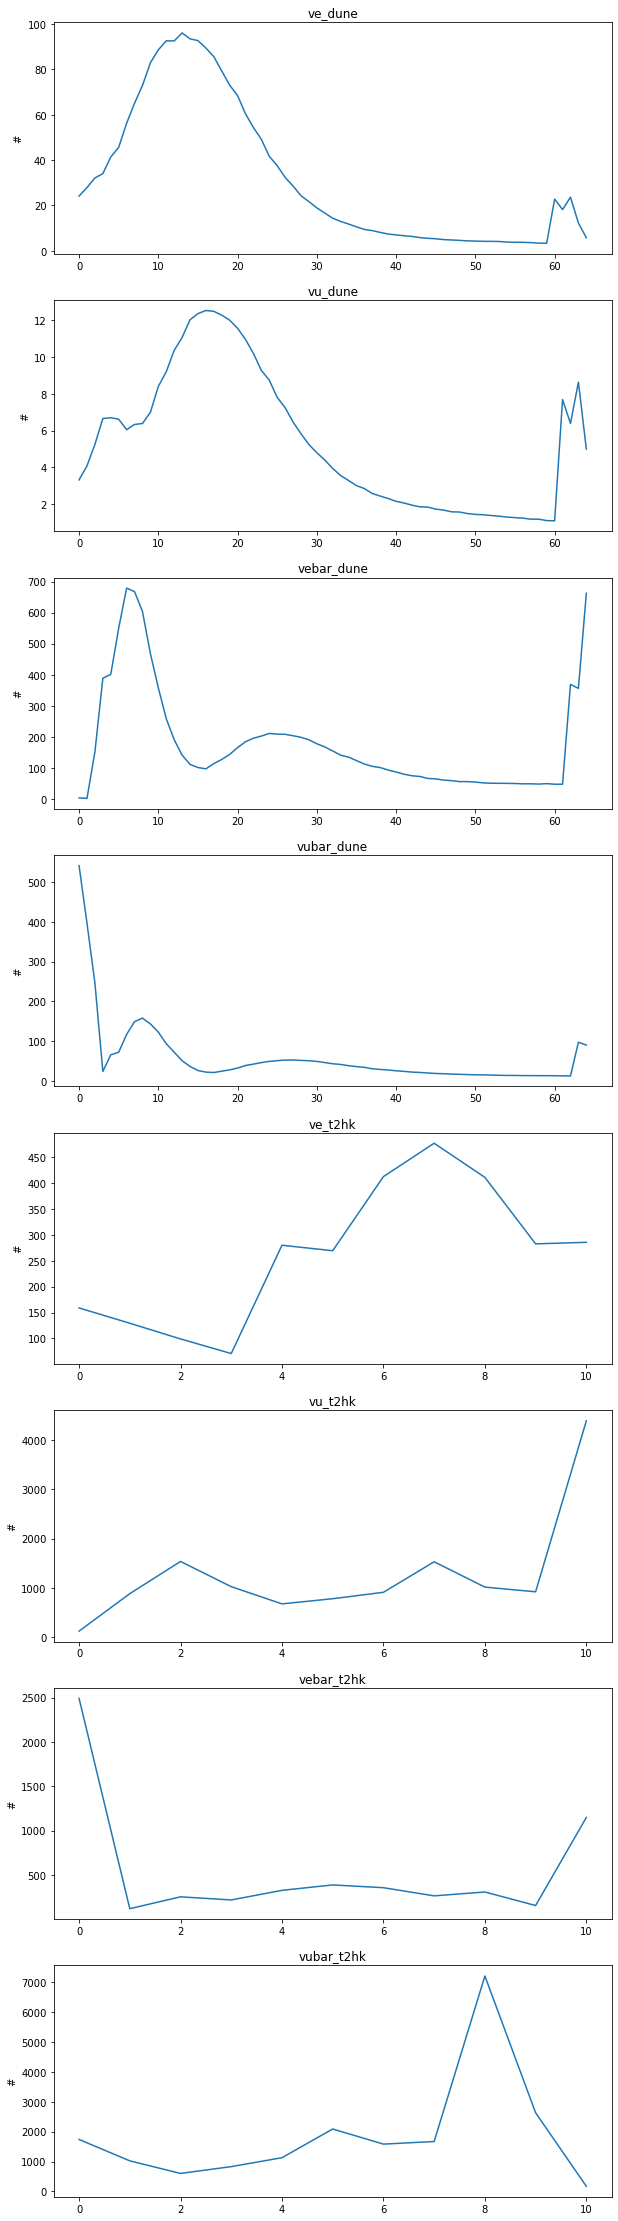

In [4]:
# Spectrum 
plt.figure(figsize = (10,40))
feature = ['ve_dune','vu_dune','vebar_dune','vubar_dune','ve_t2hk','vu_t2hk','vebar_t2hk','vubar_t2hk']
n = 0
for i in feature:
    n = n+1
    plt.subplot(len(feature),1,n)
    plt.xlabel('')
    plt.ylabel('#')
    y = data[i][0]
    x = range(len(y))
    plt.plot(x,y)
    plt.title(i)


In [6]:
# Spectrum
data['ve_dune'][0]

array([24.1608 , 27.8949 , 32.1312 , 34.0347 , 41.3858 , 45.6594 ,
       56.2546 , 65.1175 , 72.9502 , 82.9623 , 88.6617 , 92.6282 ,
       92.597  , 96.1302 , 93.5203 , 92.7294 , 89.4511 , 85.6791 ,
       79.3492 , 73.0879 , 68.466  , 60.4136 , 54.3685 , 49.16   ,
       41.6695 , 37.5353 , 32.353  , 28.5496 , 24.2859 , 21.6735 ,
       18.9523 , 16.656  , 14.3656 , 12.9677 , 11.7915 , 10.5483 ,
        9.40745,  8.89426,  8.10109,  7.38537,  7.00715,  6.63697,
        6.33732,  5.8167 ,  5.50237,  5.30877,  4.93445,  4.77149,
        4.59579,  4.37128,  4.27683,  4.1783 ,  4.15764,  4.10048,
        3.82313,  3.77145,  3.73899,  3.61347,  3.34549,  3.35565,
       22.8086 , 18.1688 , 23.6701 , 12.2537 ,  5.72492])

In [7]:
# Label
print("octant label",data['octant'])
print("cpv label",data['cpv'])
print("mo label",data['mo'])

octant label [-1. -1. -1. ...  1. -1. -1.]
cpv label [0. 1. 0. ... 0. 1. 0.]
mo label [ 1.  1.  1. ... -1.  1.  1.]


In [8]:
# Splitting 
n = 10000

cpv = data['cpv'][:n]

ve_dune = data['ve_dune'][:n]
vu_dune = data['vu_dune'][:n]
vebar_dune = data['vebar_dune'][:n]
vubar_dune = data['vubar_dune'][:n]


ve_t2hk = data['ve_t2hk'][:n]
vu_t2hk = data['vu_t2hk'][:n]
vebar_t2hk = data['vebar_t2hk'][:n]
vubar_t2hk = data['vubar_t2hk'][:n]

ve2_dune = np.hstack((ve_dune,vebar_dune))[:n] #合併ve和ve_bar
ve2_t2hk = np.hstack((ve_t2hk,vebar_t2hk))[:n] #合併ve和ve_bar
ve4 = np.hstack((ve_dune,vebar_dune,ve_t2hk,vebar_t2hk))[:n] #合併ve和ve_bar


from sklearn.model_selection import train_test_split
ve_dune_train, ve_dune_test, cpv_train_ve_dune, cpv_test_ve_dune = train_test_split(ve_dune, cpv, test_size=0.10, random_state=32)
vu_dune_train, vu_dune_test, cpv_train_vu_dune, cpv_test_vu_dune = train_test_split(vu_dune, cpv, test_size=0.10, random_state=32)
vebar_dune_train, vebar_dune_test, cpv_train_vebar_dune, cpv_test_vebar_dune = train_test_split(vebar_dune, cpv, test_size=0.10, random_state=32)
vubar_dune_train, vubar_dune_test, cpv_train_vubar_dune, cpv_test_vubar_dune = train_test_split(vubar_dune, cpv, test_size=0.10, random_state=32)


ve_t2hk_train, ve_t2hk_test, cpv_train_ve_t2hk, cpv_test_ve_t2hk = train_test_split(ve_t2hk, cpv, test_size=0.10, random_state=32)
vu_t2hk_train, vu_t2hk_test, cpv_train_vu_t2hk, cpv_test_vu_t2hk = train_test_split(vu_t2hk, cpv, test_size=0.10, random_state=32)
vebar_t2hk_train, vebar_t2hk_test, cpv_train_vebar_t2hk, cpv_test_vebar_t2hk = train_test_split(vebar_t2hk, cpv, test_size=0.10, random_state=32)
vubar_t2hk_train, vubar_t2hk_test, cpv_train_vubar_t2hk, cpv_test_vubar_t2hk = train_test_split(vubar_t2hk, cpv, test_size=0.10, random_state=32)

ve2_dune_train, ve2_dune_test, cpv_train_ve2_dune, cpv_test_ve2_dune = train_test_split(ve2_dune, cpv, test_size=0.10, random_state=32)
ve2_t2hk_train, ve2_t2hk_test, cpv_train_ve2_t2hk, cpv_test_ve2_t2hk = train_test_split(ve2_t2hk, cpv, test_size=0.10, random_state=32)
ve4_train, ve4_test, cpv_train_ve4, cpv_test_ve4 = train_test_split(ve4, cpv, test_size=0.10, random_state=32)



In [9]:
print("ve_t2hk_train",ve_t2hk_train.shape)
print("ve_t2hk_test",ve_t2hk_test.shape)
print("cpv_train_ve_t2hk",cpv_train_ve_t2hk.shape)
print("cpv_test_ve_t2hk",cpv_test_ve_t2hk.shape)

ve_t2hk_train (9000, 11)
ve_t2hk_test (1000, 11)
cpv_train_ve_t2hk (9000,)
cpv_test_ve_t2hk (1000,)


In [10]:
print("ve4_train",ve4_train.shape)
print("ve4_test",ve4_test.shape)
print("cpv_train_ve4",cpv_train_ve4.shape)
print("cpv_test_ve4",cpv_test_ve4.shape)

ve4_train (9000, 152)
ve4_test (1000, 152)
cpv_train_ve4 (9000,)
cpv_test_ve4 (1000,)


In [11]:
print("ve2_dune_train",ve2_dune_train.shape)
print("ve2_dune_test",ve2_dune_test.shape)
print("cpv_train_ve2_dune",cpv_train_ve2_dune.shape)
print("cpv_test_ve2_dune",cpv_test_ve2_dune.shape)

ve2_dune_train (9000, 130)
ve2_dune_test (1000, 130)
cpv_train_ve2_dune (9000,)
cpv_test_ve2_dune (1000,)


Training Score:  0.9597777777777777
Testing Score:  0.955


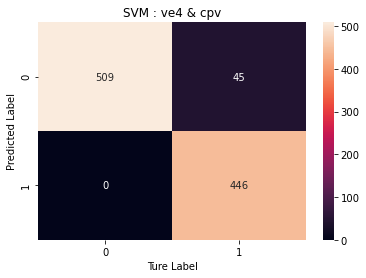

In [12]:
# SVM : Spectrum ve4 & cpv

#Choose Spectrum type
v_train = ve4_train
cpv_train = cpv_train_ve4
v_test = ve4_test
cpv_test = cpv_test_ve4

# SVM training
from sklearn.svm import SVC
model_svm = SVC(kernel='linear', C=1)
model_svm.fit(v_train,cpv_train)

print('Training Score: ',model_svm.score(v_train, cpv_train))
print('Testing Score: ', model_svm.score(v_test, cpv_test))

cpv_pred_svm = model_svm.predict(v_test)
import seaborn as sn
from sklearn.metrics import confusion_matrix
confusion_matrix_svm = confusion_matrix(cpv_pred_svm,cpv_test)

sn.heatmap(confusion_matrix_svm, annot=True, fmt = 'g')
plt.title('SVM : ve4 & cpv')
plt.xlabel('Ture Label')
plt.ylabel('Predicted Label')
plt.show()

Text(0.5, 1.0, 'cpv=0')

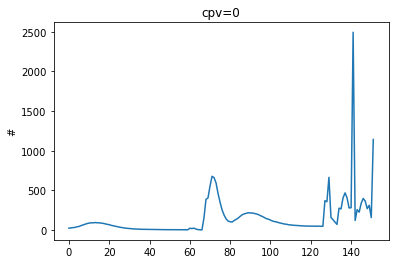

In [13]:
v_test_0 = v_test[cpv_pred_svm == 0]

plt.xlabel('')
plt.ylabel('#')
y = v_test_0[0]
x = range(len(y))
plt.plot(x,y)
plt.title('cpv=0')

Text(0.5, 1.0, 'cpv=1')

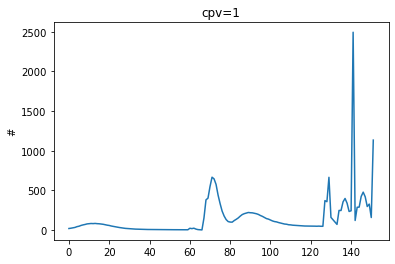

In [14]:
v_test_1 = v_test[cpv_pred_svm == 1]

plt.xlabel('')
plt.ylabel('#')
y = v_test_1[0]
x = range(len(y))
plt.plot(x,y)
plt.title('cpv=1')

In [53]:
index_01 = []
index_10 = []
for i in range(len(cpv_test)):
    if cpv_test[i] ==0 and cpv_pred_svm[i] == 1:
        index_01.append(i)
    if cpv_test[i] ==1 and cpv_pred_svm[i] == 0:
        index_10.append(i)

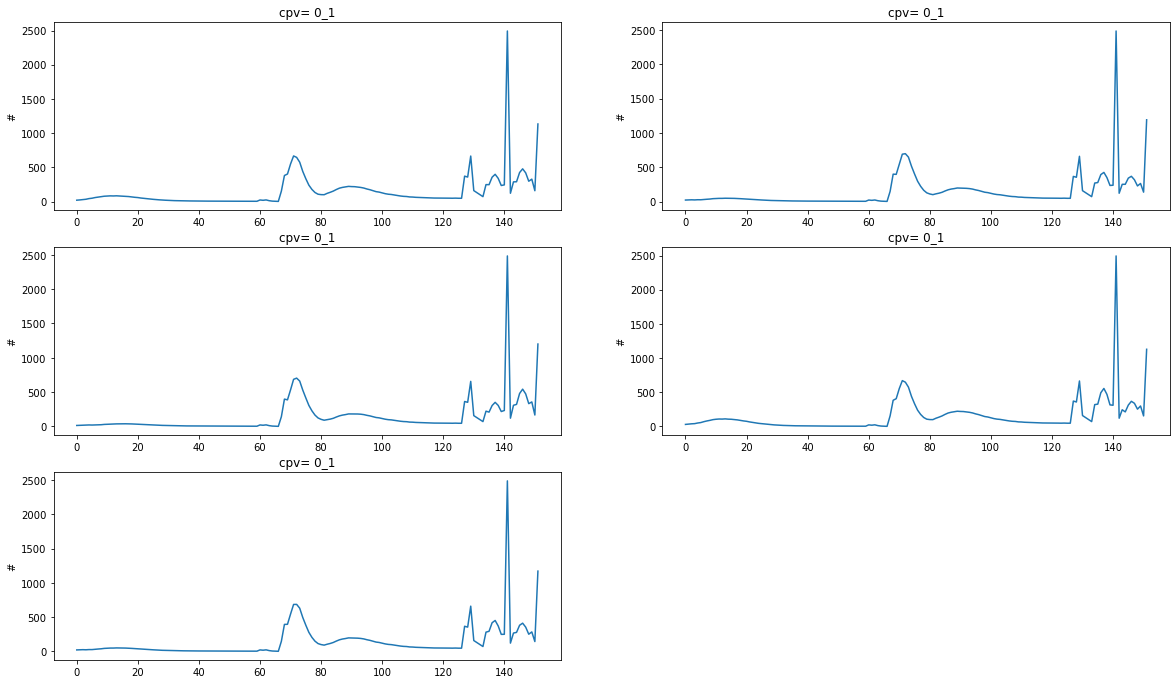

In [55]:
v_test_01 = v_test[index_01]
n = 5
plt.figure(figsize = (20,20))
for i in range(n):    
    plt.subplot(n,2,i+1)
    plt.xlabel('')
    plt.ylabel('#')
    y = v_test_1[i]
    x = range(len(y))
    plt.plot(x,y)
    plt.title('cpv= 0_1')

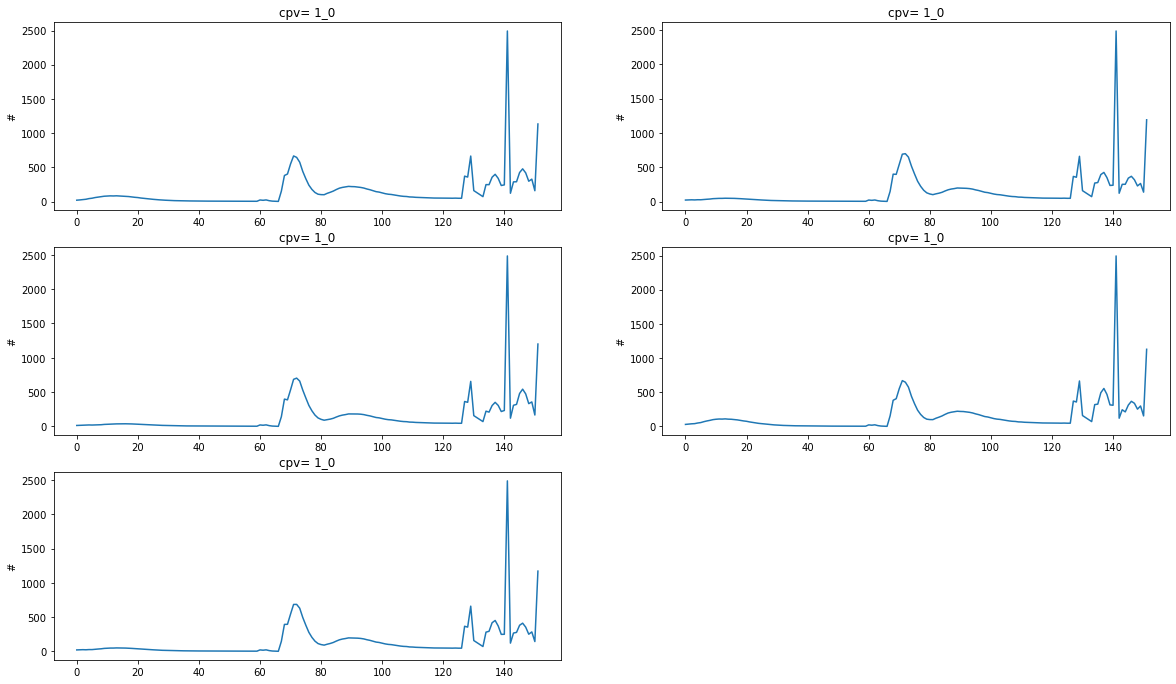

In [56]:
v_test_10 = v_test[index_10]
n = 5
plt.figure(figsize = (20,20))
for i in range(n):    
    plt.subplot(n,2,i+1)
    plt.xlabel('')
    plt.ylabel('#')
    y = v_test_1[i]
    x = range(len(y))
    plt.plot(x,y)
    plt.title('cpv= 1_0')

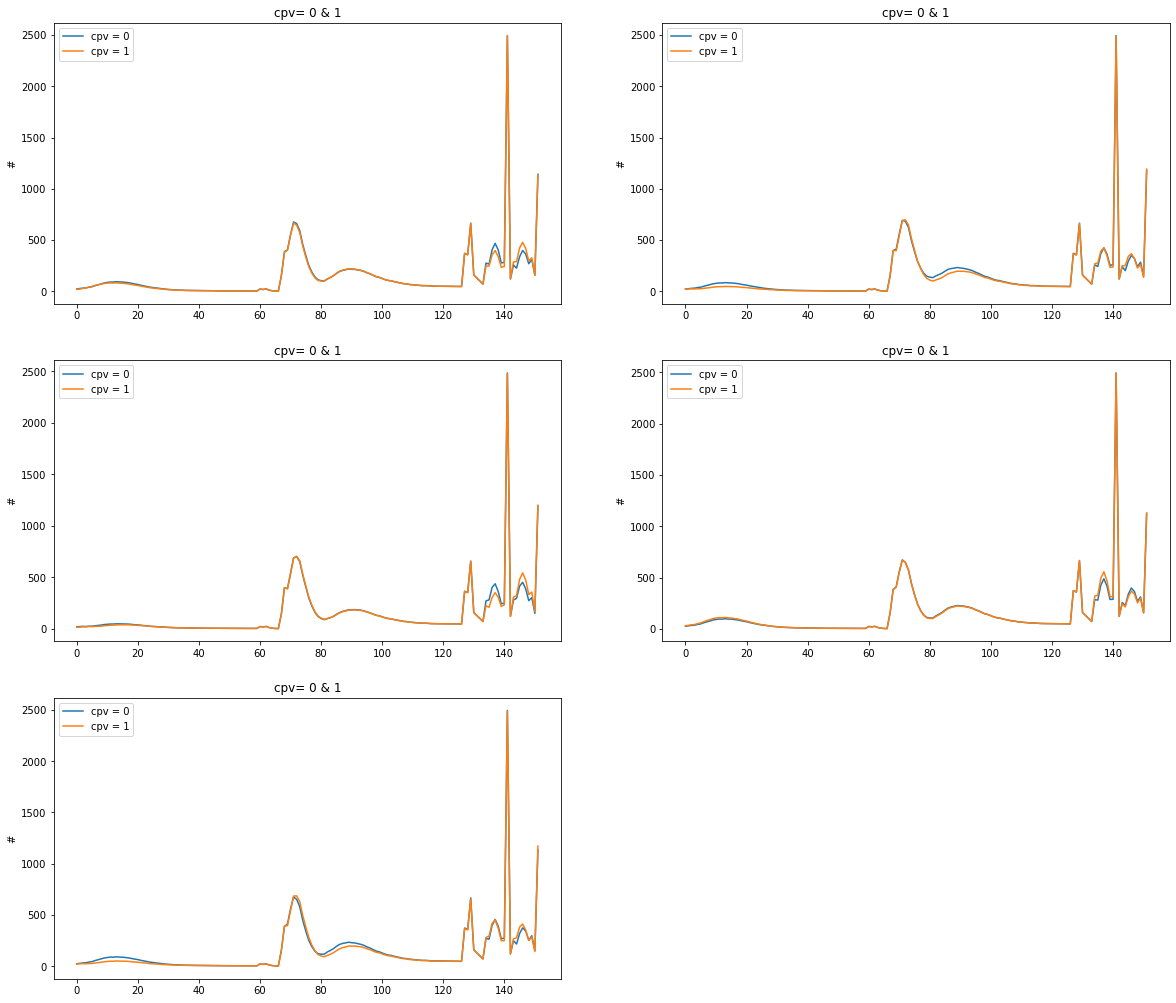

In [57]:
v_test_0 = v_test[cpv_pred_svm == 0]
v_test_1 = v_test[cpv_pred_svm == 1]
n = 5
plt.figure(figsize = (20,30))
for i in range(n):    
    plt.subplot(n,2,i+1)
    plt.xlabel('')
    plt.ylabel('#')
    y0 = v_test_0[i]
    y1 = v_test_1[i]
    x = range(len(y))
    plt.plot(x,y0, label = 'cpv = 0')
    plt.plot(x,y1, label = 'cpv = 1')
    plt.legend()
    plt.title('cpv= 0 & 1')

Training Score:  0.9275555555555556
Testing Score:  0.908


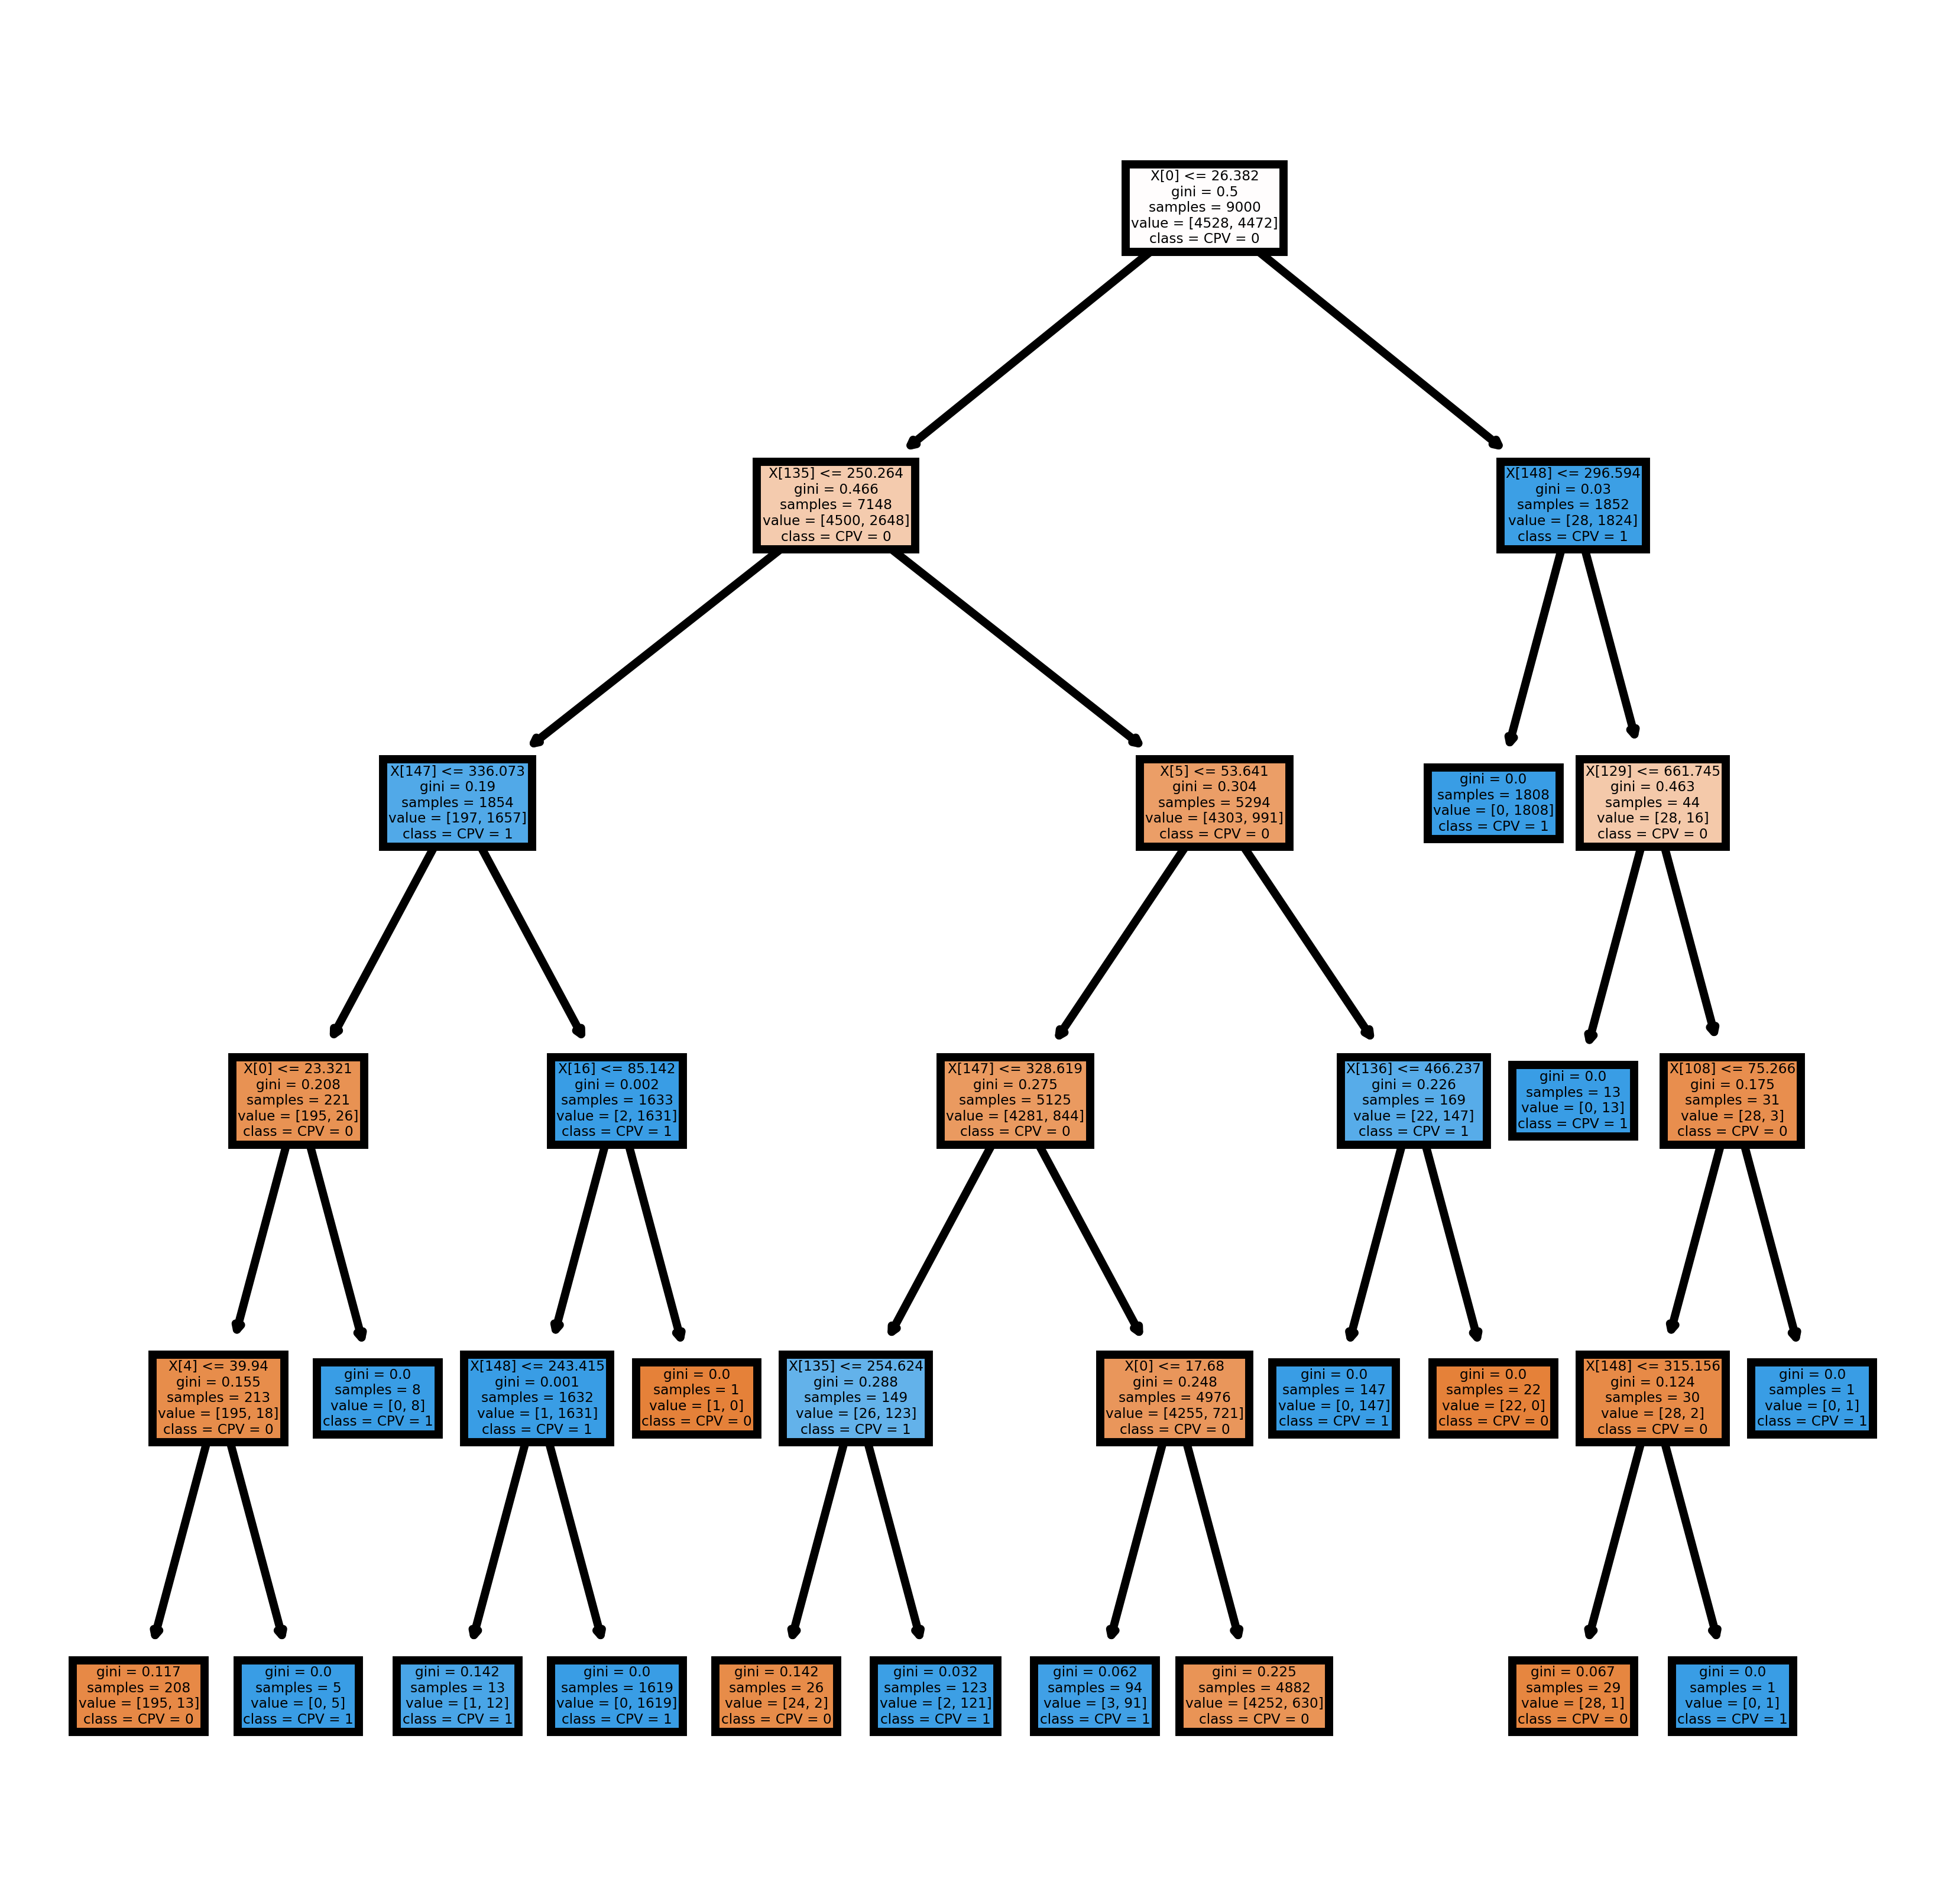

In [15]:

# Decision Tree : Spectrum ve4 & cpv

#Choose Spectrum type
v_train = ve4_train
cpv_train = cpv_train_ve4
v_test = ve4_test
cpv_test = cpv_test_ve4


# tree training
from sklearn import tree
tree_model = tree.DecisionTreeClassifier(max_depth = 5)
tree_model.fit(v_train, cpv_train)

classes = ['CPV = 0','CPV = 1']

# Plot tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1000)
tree.plot_tree(tree_model, class_names = classes, filled=True)

# Evaluate model
print('Training Score: ', tree_model.score(v_train,cpv_train))
print('Testing Score: ', tree_model.score(v_test, cpv_test))


Training Score mlp:  0.5031111111111111
Testing Score mlp:  0.509


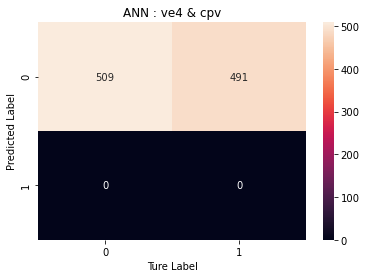

In [26]:
# ANN  ve4 & cpv

#Choose Spectrum type
v_train = ve4_train
cpv_train = cpv_train_ve4
v_test = ve4_test
cpv_test = cpv_test_ve4

# MLP training
iteration = 50
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(hidden_layer_sizes=(2), activation='tanh', max_iter=iteration, solver='sgd')

model_mlp.fit(v_train, cpv_train)

print('Training Score mlp: ', model_mlp.score(v_train, cpv_train))
print('Testing Score mlp: ', model_mlp.score(v_test, cpv_test))

cpv_pred_mlp = model_mlp.predict(v_test)

import seaborn as sn
from sklearn.metrics import confusion_matrix
confusion_matrix_mlp = confusion_matrix(cpv_pred_mlp,cpv_test)

sn.heatmap(confusion_matrix_mlp, annot=True, fmt = 'g')
plt.title('ANN : ve4 & cpv')
plt.xlabel('Ture Label')
plt.ylabel('Predicted Label')
plt.show()

Training Score:  0.9387777777777778
Testing Score:  0.931


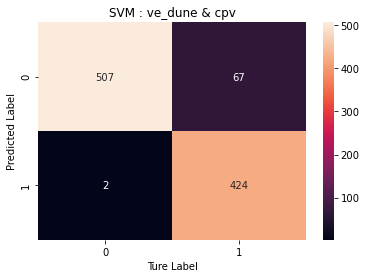

In [11]:
# SVM : Spectrum ve_dune & cpv

#Choose Spectrum type
v_train = ve_dune_train
cpv_train = cpv_train_ve_dune
v_test = ve_dune_test
cpv_test = cpv_test_ve_dune

# SVM training
from sklearn.svm import SVC
model_svm = SVC(kernel='linear', C=1)
model_svm.fit(v_train,cpv_train)

print('Training Score: ',model_svm.score(v_train, cpv_train))
print('Testing Score: ', model_svm.score(v_test, cpv_test))

cpv_pred_svm = model_svm.predict(v_test)
import seaborn as sn
from sklearn.metrics import confusion_matrix
confusion_matrix_svm = confusion_matrix(cpv_pred_svm,cpv_test)

sn.heatmap(confusion_matrix_svm, annot=True, fmt = 'g')
plt.title('SVM : ve_dune & cpv')
plt.xlabel('Ture Label')
plt.ylabel('Predicted Label')
plt.show()

Training Score:  0.8715555555555555
Testing Score:  0.853


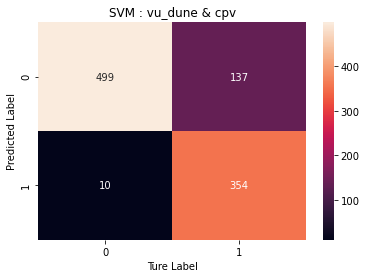

In [12]:
# SVM : Spectrum vu_dune & cpv

#Choose Spectrum type
v_train = vu_dune_train
cpv_train = cpv_train_vu_dune
v_test = vu_dune_test
cpv_test = cpv_test_vu_dune

# SVM training
from sklearn.svm import SVC
model_svm = SVC(kernel='linear', C=1)
model_svm.fit(v_train,cpv_train)

print('Training Score: ',model_svm.score(v_train, cpv_train))
print('Testing Score: ', model_svm.score(v_test, cpv_test))

cpv_pred_svm = model_svm.predict(v_test)
import seaborn as sn
from sklearn.metrics import confusion_matrix
confusion_matrix_svm = confusion_matrix(cpv_pred_svm,cpv_test)

sn.heatmap(confusion_matrix_svm, annot=True, fmt = 'g')
plt.title('SVM : vu_dune & cpv')
plt.xlabel('Ture Label')
plt.ylabel('Predicted Label')
plt.show()

Training Score:  0.9467777777777778
Testing Score:  0.939


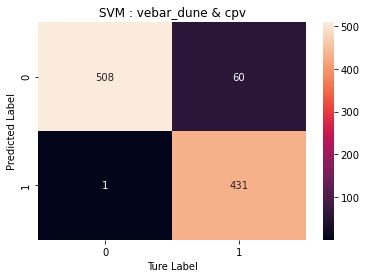

In [13]:
# SVM : Spectrum vebar_dune & cpv

#Choose Spectrum type
v_train = vebar_dune_train
cpv_train = cpv_train_vebar_dune
v_test = vebar_dune_test
cpv_test = cpv_test_vebar_dune

# SVM training
from sklearn.svm import SVC
model_svm = SVC(kernel='linear', C=1)
model_svm.fit(v_train,cpv_train)

print('Training Score: ',model_svm.score(v_train, cpv_train))
print('Testing Score: ', model_svm.score(v_test, cpv_test))

cpv_pred_svm = model_svm.predict(v_test)
import seaborn as sn
from sklearn.metrics import confusion_matrix
confusion_matrix_svm = confusion_matrix(cpv_pred_svm,cpv_test)

sn.heatmap(confusion_matrix_svm, annot=True, fmt = 'g')
plt.title('SVM : vebar_dune & cpv')
plt.xlabel('Ture Label')
plt.ylabel('Predicted Label')
plt.show()

Training Score:  0.8616666666666667
Testing Score:  0.838


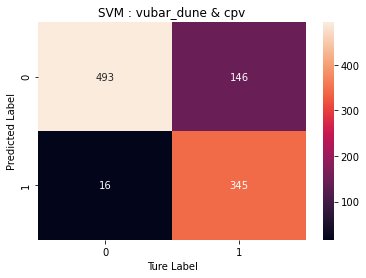

In [14]:
# SVM : Spectrum vubar_dune & cpv

#Choose Spectrum type
v_train = vubar_dune_train
cpv_train = cpv_train_vubar_dune
v_test = vubar_dune_test
cpv_test = cpv_test_vubar_dune

# SVM training
from sklearn.svm import SVC
model_svm = SVC(kernel='linear', C=1)
model_svm.fit(v_train,cpv_train)

print('Training Score: ',model_svm.score(v_train, cpv_train))
print('Testing Score: ', model_svm.score(v_test, cpv_test))

cpv_pred_svm = model_svm.predict(v_test)
import seaborn as sn
from sklearn.metrics import confusion_matrix
confusion_matrix_svm = confusion_matrix(cpv_pred_svm,cpv_test)

sn.heatmap(confusion_matrix_svm, annot=True, fmt = 'g')
plt.title('SVM : vubar_dune & cpv')
plt.xlabel('Ture Label')
plt.ylabel('Predicted Label')
plt.show()

Training Score:  0.9553333333333334
Testing Score:  0.949


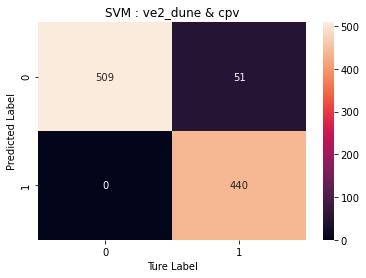

In [15]:
# SVM : Spectrum ve2_dune & cpv

#Choose Spectrum type
v_train = ve2_dune_train
cpv_train = cpv_train_ve2_dune
v_test = ve2_dune_test
cpv_test = cpv_test_ve2_dune

# SVM training
from sklearn.svm import SVC
model_svm = SVC(kernel='linear', C=1)
model_svm.fit(v_train,cpv_train)

print('Training Score: ',model_svm.score(v_train, cpv_train))
print('Testing Score: ', model_svm.score(v_test, cpv_test))

cpv_pred_svm = model_svm.predict(v_test)
import seaborn as sn
from sklearn.metrics import confusion_matrix
confusion_matrix_svm = confusion_matrix(cpv_pred_svm,cpv_test)

sn.heatmap(confusion_matrix_svm, annot=True, fmt = 'g')
plt.title('SVM : ve2_dune & cpv')
plt.xlabel('Ture Label')
plt.ylabel('Predicted Label')
plt.show()

Training Score:  0.8323333333333334
Testing Score:  0.821


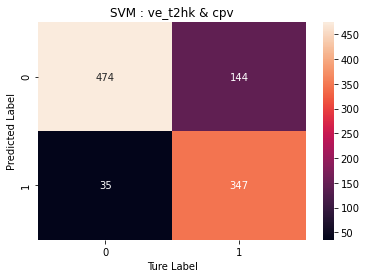

In [16]:
# SVM : Spectrum ve_t2hk & cpv

#Choose Spectrum type
v_train = ve_t2hk_train
cpv_train = cpv_train_ve_t2hk
v_test = ve_t2hk_test
cpv_test = cpv_test_ve_t2hk

# SVM training
from sklearn.svm import SVC
model_svm = SVC(kernel='linear', C=1)
model_svm.fit(v_train,cpv_train)

print('Training Score: ',model_svm.score(v_train, cpv_train))
print('Testing Score: ', model_svm.score(v_test, cpv_test))

cpv_pred_svm = model_svm.predict(v_test)
import seaborn as sn
from sklearn.metrics import confusion_matrix
confusion_matrix_svm = confusion_matrix(cpv_pred_svm,cpv_test)

sn.heatmap(confusion_matrix_svm, annot=True, fmt = 'g')
plt.title('SVM : ve_t2hk & cpv')
plt.xlabel('Ture Label')
plt.ylabel('Predicted Label')
plt.show()

Training Score:  0.6808888888888889
Testing Score:  0.678


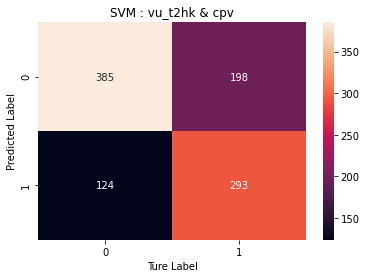

In [17]:
# SVM : Spectrum vu_t2hk & cpv
#Note: Score is low

#Choose Spectrum type
v_train = vu_t2hk_train
cpv_train = cpv_train_vu_t2hk
v_test = vu_t2hk_test
cpv_test = cpv_test_vu_t2hk

# SVM training
from sklearn.svm import SVC
model_svm = SVC(kernel='linear', C=1)
model_svm.fit(v_train,cpv_train)

print('Training Score: ',model_svm.score(v_train, cpv_train))
print('Testing Score: ', model_svm.score(v_test, cpv_test))

cpv_pred_svm = model_svm.predict(v_test)
import seaborn as sn
from sklearn.metrics import confusion_matrix
confusion_matrix_svm = confusion_matrix(cpv_pred_svm,cpv_test)

sn.heatmap(confusion_matrix_svm, annot=True, fmt = 'g')
plt.title('SVM : vu_t2hk & cpv')
plt.xlabel('Ture Label')
plt.ylabel('Predicted Label')
plt.show()

Training Score:  0.8095555555555556
Testing Score:  0.799


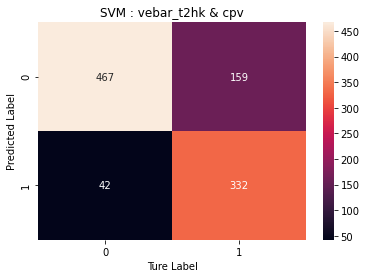

In [18]:
# SVM : Spectrum vebar_t2hk & cpv
#Note: Score is low

#Choose Spectrum type
v_train = vebar_t2hk_train
cpv_train = cpv_train_vebar_t2hk
v_test = vebar_t2hk_test
cpv_test = cpv_test_vebar_t2hk

# SVM training
from sklearn.svm import SVC
model_svm = SVC(kernel='linear', C=1)
model_svm.fit(v_train,cpv_train)

print('Training Score: ',model_svm.score(v_train, cpv_train))
print('Testing Score: ', model_svm.score(v_test, cpv_test))

cpv_pred_svm = model_svm.predict(v_test)
import seaborn as sn
from sklearn.metrics import confusion_matrix
confusion_matrix_svm = confusion_matrix(cpv_pred_svm,cpv_test)

sn.heatmap(confusion_matrix_svm, annot=True, fmt = 'g')
plt.title('SVM : vebar_t2hk & cpv')
plt.xlabel('Ture Label')
plt.ylabel('Predicted Label')
plt.show()

Training Score:  0.7066666666666667
Testing Score:  0.698


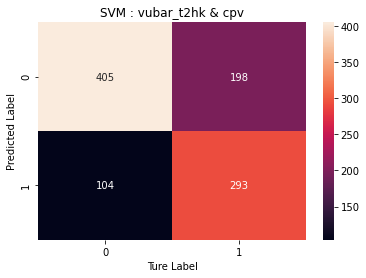

In [19]:
# SVM : Spectrum vubar_t2hk & cpv
#Note: Score is low

#Choose Spectrum type
v_train = vubar_t2hk_train
cpv_train = cpv_train_vubar_t2hk
v_test = vubar_t2hk_test
cpv_test = cpv_test_vubar_t2hk

# SVM training
from sklearn.svm import SVC
model_svm = SVC(kernel='linear', C=1)
model_svm.fit(v_train,cpv_train)

print('Training Score: ',model_svm.score(v_train, cpv_train))
print('Testing Score: ', model_svm.score(v_test, cpv_test))

cpv_pred_svm = model_svm.predict(v_test)
import seaborn as sn
from sklearn.metrics import confusion_matrix
confusion_matrix_svm = confusion_matrix(cpv_pred_svm,cpv_test)

sn.heatmap(confusion_matrix_svm, annot=True, fmt = 'g')
plt.title('SVM : vubar_t2hk & cpv')
plt.xlabel('Ture Label')
plt.ylabel('Predicted Label')
plt.show()

Training Score mlp:  0.9068888888888889
Testing Score mlp:  0.901


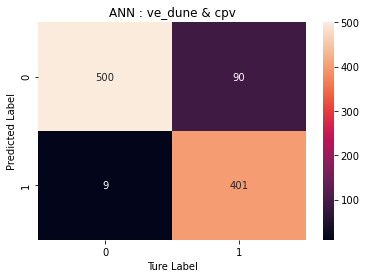

In [20]:
# ANN  ve_dune & cpv

#Choose Spectrum type
v_train = ve_dune_train
cpv_train = cpv_train_ve_dune
v_test = ve_dune_test
cpv_test = cpv_test_ve_dune

# MLP training
iteration = 50000 
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(hidden_layer_sizes=(30), activation='relu', max_iter=iteration, solver='sgd')

model_mlp.fit(v_train, cpv_train)

print('Training Score mlp: ', model_mlp.score(v_train, cpv_train))
print('Testing Score mlp: ', model_mlp.score(v_test, cpv_test))

cpv_pred_mlp = model_mlp.predict(v_test)

import seaborn as sn
from sklearn.metrics import confusion_matrix
confusion_matrix_mlp = confusion_matrix(cpv_pred_mlp,cpv_test)

sn.heatmap(confusion_matrix_mlp, annot=True, fmt = 'g')
plt.title('ANN : ve_dune & cpv')
plt.xlabel('Ture Label')
plt.ylabel('Predicted Label')
plt.show()

Training Score mlp:  0.8981111111111111
Testing Score mlp:  0.87


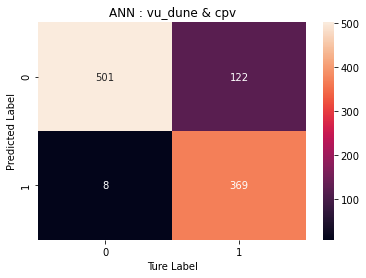

In [21]:
# ANN  vu_dune & cpv

#Choose Spectrum type
v_train = vu_dune_train
cpv_train = cpv_train_vu_dune
v_test = vu_dune_test
cpv_test = cpv_test_vu_dune

# MLP training
iteration = 50000 
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(hidden_layer_sizes=(30), activation='relu', max_iter=iteration, solver='sgd')

model_mlp.fit(v_train, cpv_train)

print('Training Score mlp: ', model_mlp.score(v_train, cpv_train))
print('Testing Score mlp: ', model_mlp.score(v_test, cpv_test))

cpv_pred_mlp = model_mlp.predict(v_test)

import seaborn as sn
from sklearn.metrics import confusion_matrix
confusion_matrix_mlp = confusion_matrix(cpv_pred_mlp,cpv_test)

sn.heatmap(confusion_matrix_mlp, annot=True, fmt = 'g')
plt.title('ANN : vu_dune & cpv')
plt.xlabel('Ture Label')
plt.ylabel('Predicted Label')
plt.show()

Training Score mlp:  0.5031111111111111
Testing Score mlp:  0.509


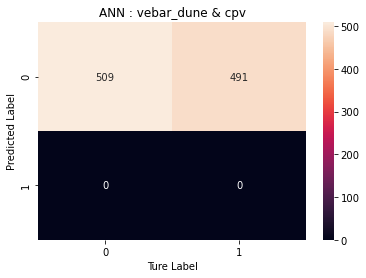

In [22]:
# ANN  vebar_dune & cpv

#Choose Spectrum type
v_train = vebar_dune_train
cpv_train = cpv_train_vebar_dune
v_test = vebar_dune_test
cpv_test = cpv_test_vebar_dune

# MLP training
iteration = 50000 
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(hidden_layer_sizes=(30), activation='relu', max_iter=iteration, solver='sgd')

model_mlp.fit(v_train, cpv_train)

print('Training Score mlp: ', model_mlp.score(v_train, cpv_train))
print('Testing Score mlp: ', model_mlp.score(v_test, cpv_test))

cpv_pred_mlp = model_mlp.predict(v_test)

import seaborn as sn
from sklearn.metrics import confusion_matrix
confusion_matrix_mlp = confusion_matrix(cpv_pred_mlp,cpv_test)

sn.heatmap(confusion_matrix_mlp, annot=True, fmt = 'g')
plt.title('ANN : vebar_dune & cpv')
plt.xlabel('Ture Label')
plt.ylabel('Predicted Label')
plt.show()

Training Score mlp:  0.5031111111111111
Testing Score mlp:  0.509


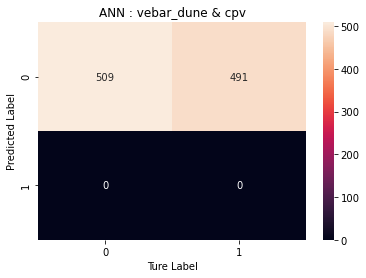

In [23]:
# ANN  vebar_dune & cpv
#Note:???

#Choose Spectrum type
v_train = vebar_dune_train
cpv_train = cpv_train_vebar_dune
v_test = vebar_dune_test
cpv_test = cpv_test_vebar_dune

# MLP training
iteration = 50000 
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(hidden_layer_sizes=(30), activation='relu', max_iter=iteration, solver='sgd')

model_mlp.fit(v_train, cpv_train)

print('Training Score mlp: ', model_mlp.score(v_train, cpv_train))
print('Testing Score mlp: ', model_mlp.score(v_test, cpv_test))

cpv_pred_mlp = model_mlp.predict(v_test)

import seaborn as sn
from sklearn.metrics import confusion_matrix
confusion_matrix_mlp = confusion_matrix(cpv_pred_mlp,cpv_test)

sn.heatmap(confusion_matrix_mlp, annot=True, fmt = 'g')
plt.title('ANN : vebar_dune & cpv')
plt.xlabel('Ture Label')
plt.ylabel('Predicted Label')
plt.show()